# One vs all heat map

## Imports

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Load data

In [3]:
RESULTS_PATH='../../data/baseline/topic-data-1.json'

In [12]:
groups_to_human_readable = {
    'political-events': 'Political Events and Figures',
    'crime-legal': 'Crime and Legal Cases',
    'disasters-accidents': 'Disasters and Accidents',
    'health-economy': 'Health, Pandemic, and Economy',
    'social-cultural-tech': 'Social, Cultural, and Tech Events'
}

groups = list(groups_to_human_readable.keys())

In [5]:
json_data = None
with open(RESULTS_PATH, 'r', encoding='utf-8') as f:
    json_data = json.load(f)

In [13]:
heatmap_data = {group: [] for group in groups}

for data in json_data:
    # Extract the 'results_against_itself' test accuracy (last element)
    test_acc_itself = data["results_against_itself"]["test_acc"][-1]
    
    # Extract the 'results_against_all' values (last elements)
    results = {list(item.keys())[0]: list(item.values())[0][1] for item in data["results_against_all"]}
    
    # Append the 'results_against_itself' value to the dictionary
    results[data['topic_group']] = test_acc_itself
    
    # Add the values to the corresponding model in the dictionary
    for group in groups:
        heatmap_data[group].append(results.get(group, float('nan')))

heatmap_data

{'political-events': [93.21266968325791,
  92.85714285714286,
  91.25475285171103,
  89.95111352525801,
  92.85714285714286],
 'crime-legal': [92.85714285714286,
  92.85714285714286,
  94.44444444444444,
  90.8994708994709,
  92.85714285714286],
 'disasters-accidents': [92.85714285714286,
  92.85714285714286,
  91.59226190476191,
  92.56198347107438,
  92.85714285714286],
 'health-economy': [92.85714285714286,
  91.74664107485604,
  92.62672811059907,
  90.95622119815668,
  92.85714285714286],
 'social-cultural-tech': [92.85714285714286,
  92.85714285714286,
  92.95774647887323,
  88.98390342052313,
  92.12730318257957]}

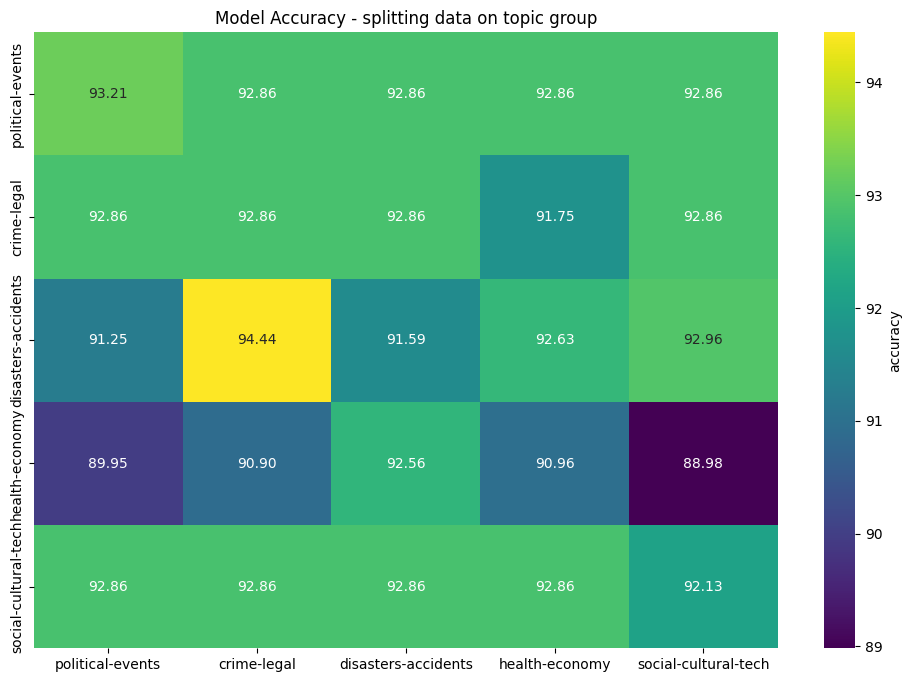

In [30]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(heatmap_data, index=groups)

# Plot the heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='viridis', fmt=".2f", cbar_kws={'label': 'accuracy'})
plt.title('Model Accuracy - splitting data on topic group')
plt.show()

## Plot heat map

In [ ]:
# 14 LLMs 
# 14x15 matrix; each row displays the accuracy of a classifier trained on one LLM and tested on the other LLM test sets, as well as the human test set
# The LLMs should be sorted for each row, so we get a classifier trained on LLM X's performance on X's test data at the diagonal square 
# (the diagonal goes from (1,1) to (14,14), as we don't train a classifier on human data only)
def plot_heat_map(data, native_metrics_dict, use_full_test_set=True, metric='test_acc'):
    test_set_attribute = 'vs_full_test_set' if use_full_test_set else 'vs_30_percent_test_set'
    heatmap_data = []

    for item in data:
        base_model = item['base_model']
        results = {}
        results['base_model'] = base_model
        results[base_model] = native_metrics_dict[base_model][metric]
        
        for result in item['results_against_all_llms']:
            for model_name, model_data in result.items():
                results[model_name] = model_data[test_set_attribute][metric]
        
        heatmap_data.append(results)
    
    # Create DataFrame
    df = pd.DataFrame(heatmap_data)
    df.set_index('base_model', inplace=True)
    df = df.sort_index(axis=1)
    
    ax = sb.heatmap(df, annot=True, annot_kws={"size": 6}, cmap='coolwarm', linewidths=0, cbar_kws={'label': f'{metric}'}, )
    ax.set(xlabel="", ylabel="")

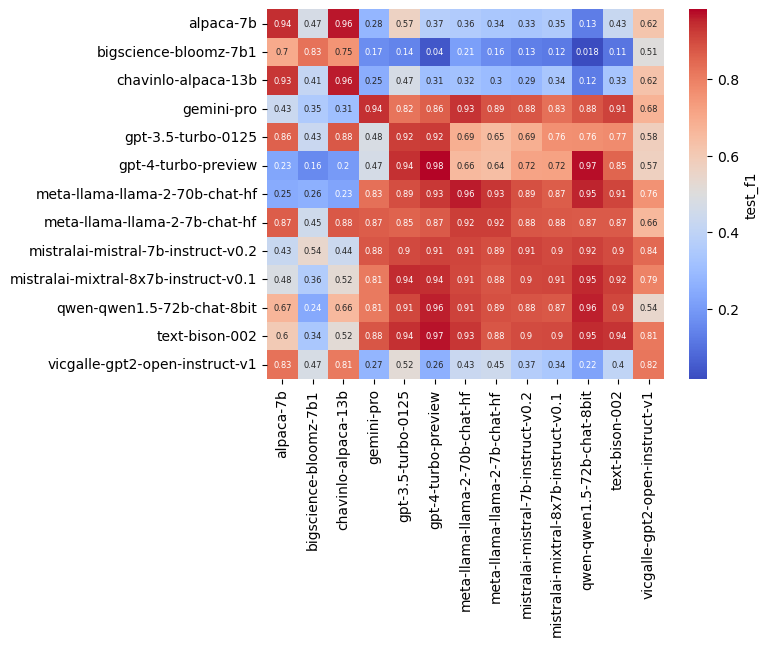

In [ ]:
plot_heat_map(data, native_metrics_dict, use_full_test_set=False, metric='test_f1')

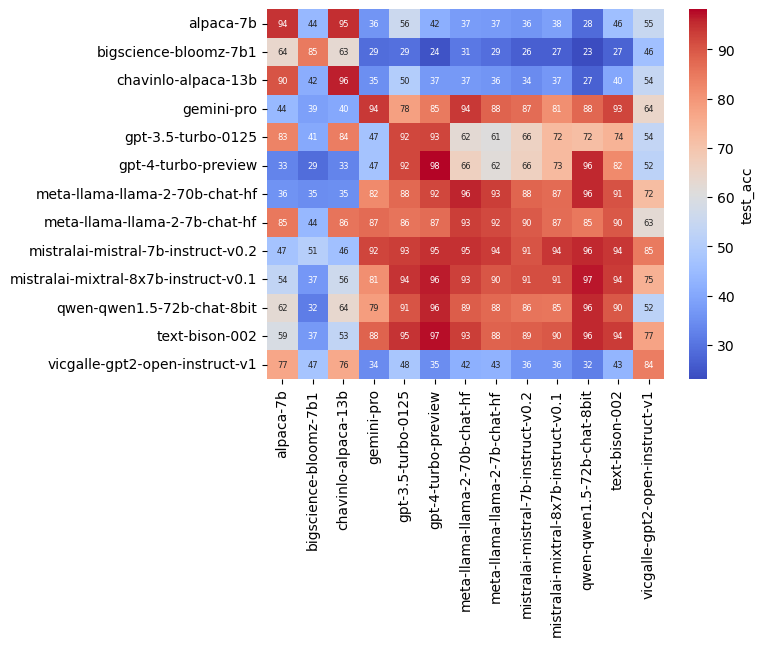

In [ ]:
plot_heat_map(data, native_metrics_dict, use_full_test_set=True, metric='test_acc')

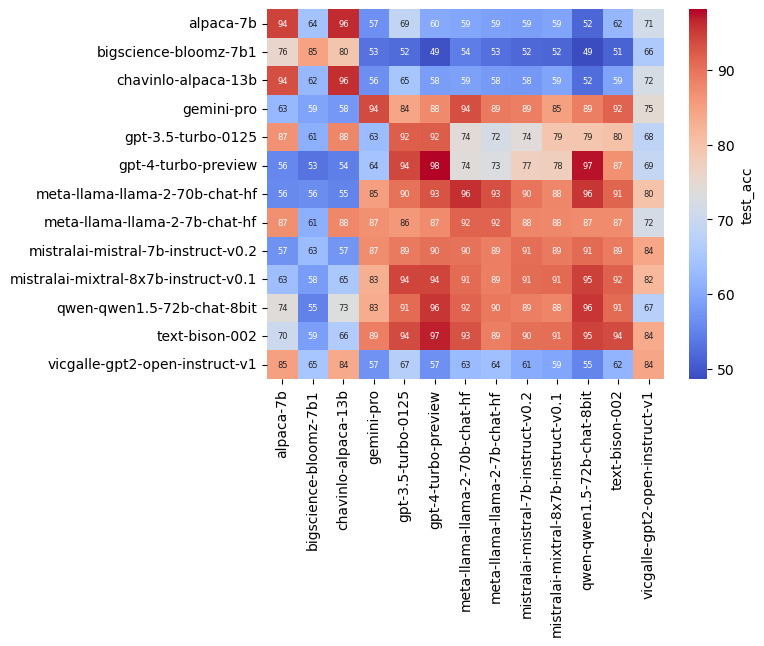

In [ ]:
plot_heat_map(data, native_metrics_dict, use_full_test_set=False, metric='test_acc')

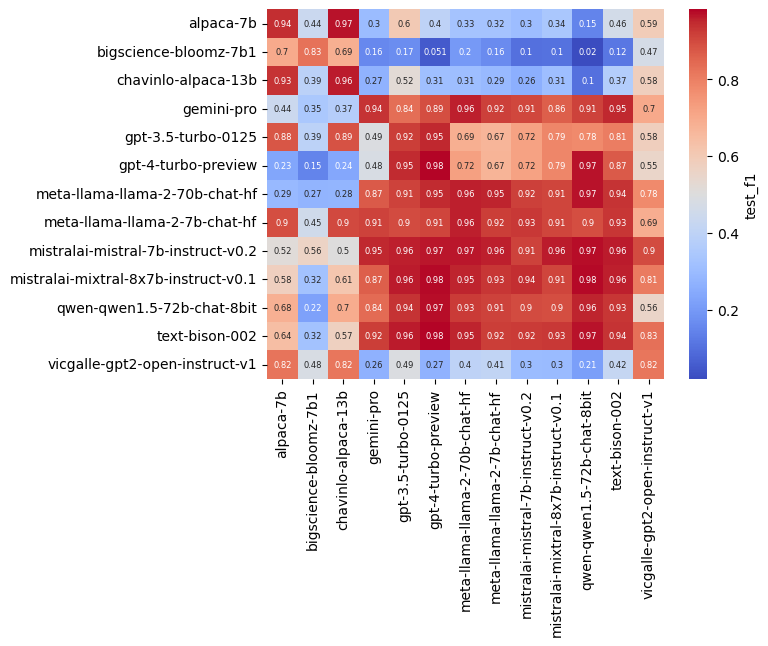

In [ ]:
plot_heat_map(data, native_metrics_dict, use_full_test_set=True, metric='test_f1')